In [1]:
import sys
import geopandas
import pandas as pd
import numpy as np
#from pyproj import CRS
try:
    from osgeo import ogr, osr, gdal
except:
    sys.exit('ERROR: cannot find GDAL/OGR modules')

In [2]:
def tif2array(input_file, dtype=np.uint8):
    """
    read GeoTiff and convert to numpy array.
    inputs:
        input_file (str) : the name of input GeoTiff file.
    return:
        image(np.array) : image for each bands
        dataset : for gdal's data drive.
    """
    dataset = gdal.Open(input_file, gdal.GA_ReadOnly)

    if dataset is None:
        return None

    # Allocate our array using the first band's datatype
    image_datatype = dataset.GetRasterBand(1).DataType
    image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                     dtype=dtype)

    # Loop over all bands in dataset
    for b in range(dataset.RasterCount):
        # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
        band = dataset.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        image[:, :, b] = band.ReadAsArray()#buf_type=gdalconst.GDT_Byte)

    #image = image[2:-2,2:-2,:]

    return image

In [3]:
#### test ####

In [4]:
path_2 = "/home/philipp/Data/edin_diss/temp/test_tamsweg.tif"
path_1 = "/home/philipp/Data/edin_diss/temp/test_zell_am_see.tif"

In [5]:
img_1 = tif2array(path_1, dtype=np.uint8)
img_2 = tif2array(path_2, dtype=np.uint8)

In [6]:
np.save("/home/philipp/Data/edin_diss/temp/img_1_raw", img_1)
np.save("/home/philipp/Data/edin_diss/temp/img_2_raw", img_2)

In [2]:
###
import matplotlib.pyplot as plt
import numpy as np

In [9]:
img_1 = img_1[:256, :256]
img_2 = img_2[:256, :256]

In [10]:
print(img_1[0,0,:])
print(img_2[0,0,:])

[35 65 88 64]
[ 49  53  51 106]


In [11]:
# reshape
img_1_res = img_1.reshape((-1,4))
img_2_res = img_2.reshape((-1,4))

In [12]:
print(img_1_res)
print(img_2_res)

[[ 35  65  88  64]
 [ 35  67  90  70]
 [ 35  68  91  73]
 ...
 [115 132 134 190]
 [104 123 123 181]
 [102 121 119 181]]
[[ 49  53  51 106]
 [ 48  50  49 107]
 [ 53  59  56 123]
 ...
 [ 41  41  36 110]
 [ 34  34  29  97]
 [ 42  44  40 112]]


In [13]:
img_1 = np.ones((img_1_res.shape[0],img_1_res.shape[1]+1))
img_1[:,:-1] = img_1_res

img_2 = np.ones((img_2_res.shape[0],img_2_res.shape[1]+1))
img_2[:,:-1] = img_2_res

In [14]:
print(img_1)
print(img_2)

[[ 35.  65.  88.  64.   1.]
 [ 35.  67.  90.  70.   1.]
 [ 35.  68.  91.  73.   1.]
 ...
 [115. 132. 134. 190.   1.]
 [104. 123. 123. 181.   1.]
 [102. 121. 119. 181.   1.]]
[[ 49.  53.  51. 106.   1.]
 [ 48.  50.  49. 107.   1.]
 [ 53.  59.  56. 123.   1.]
 ...
 [ 41.  41.  36. 110.   1.]
 [ 34.  34.  29.  97.   1.]
 [ 42.  44.  40. 112.   1.]]


In [15]:
ColorCorrectionMatrix = np.linalg.lstsq(img_1, img_2)[0]

<ipython-input-15-07e6b8e62586>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ColorCorrectionMatrix = np.linalg.lstsq(img_1, img_2)[0]


In [16]:
ColorCorrectionMatrix

array([[ 1.32320043e+00,  9.30747139e-01,  4.83731196e-01,
         1.13580403e+00, -1.22582955e-16],
       [-1.61049574e+00, -1.08381674e+00, -4.25675771e-01,
        -2.64164751e+00,  3.14852311e-16],
       [ 7.08741873e-01,  5.72341045e-01,  4.95416823e-01,
         1.21798654e+00, -1.51571464e-16],
       [-8.03168224e-02, -6.28057533e-02, -1.84056759e-01,
         5.85257407e-01, -5.24753851e-17],
       [ 5.88924490e+01,  5.11214494e+01,  3.38543603e+01,
         9.73272123e+01,  1.00000000e+00]])

In [17]:
img_1.shape

(65536, 5)

In [18]:
ColorCorrectionMatrix.shape

(5, 5)

In [19]:
img_3 = np.matmul(img_1, ColorCorrectionMatrix)

In [21]:
np.save("/home/philipp/Data/edin_diss/temp/img_1", img_1)
np.save("/home/philipp/Data/edin_diss/temp/img_2", img_2)
np.save("/home/philipp/Data/edin_diss/temp/img_3", img_3)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
img_1 = np.load("/home/philipp/Data/edin_diss/temp/img_1.npy")
img_2 = np.load("/home/philipp/Data/edin_diss/temp/img_2.npy")
img_3 = np.load("/home/philipp/Data/edin_diss/temp/img_3.npy")

In [9]:
img_1 = img_1[:,:4]
img_2 = img_2[:,:4]
img_3 = img_3[:,:4]

In [12]:
img_1 = img_1.reshape((256,256,4))
img_2 = img_2.reshape((256,256,4))
img_3 = img_3.reshape((256,256,4))

In [15]:
img_1 = img_1.astype(int)
img_2 = img_2.astype(int)
img_3 = img_3.astype(int)

(-0.5, 255.5, 255.5, -0.5)

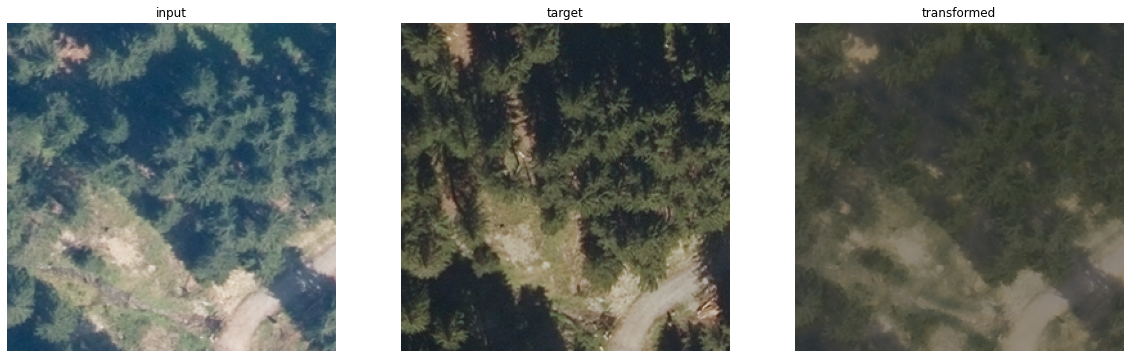

In [18]:
fig = plt.figure(figsize=(20,20))
        
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img_1[:,:,:3])
a.set_title('input')
plt.axis('off')

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(img_2[:,:,:3])
a.set_title('target')
plt.axis('off')

a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(img_3[:,:,:3])
a.set_title('transformed')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

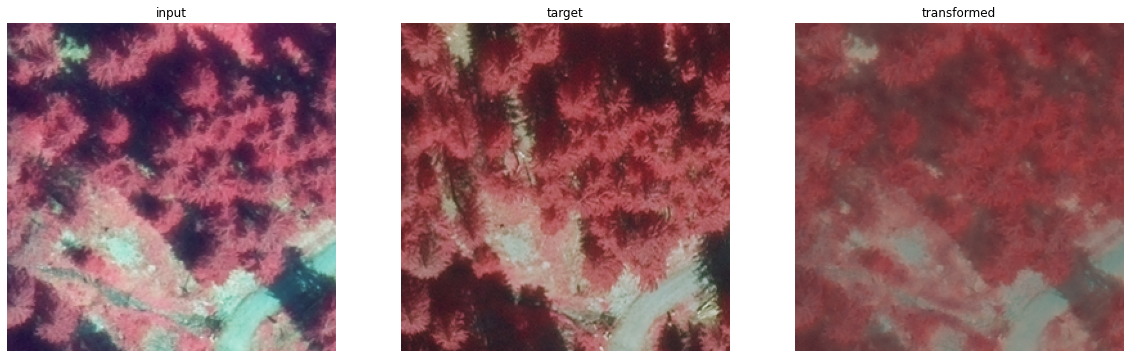

In [19]:
fig = plt.figure(figsize=(20,20))
        
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(np.roll(img_1, 1, axis=2)[:,:,:3])
a.set_title('input')
plt.axis('off')

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(np.roll(img_2, 1, axis=2)[:,:,:3])
a.set_title('target')
plt.axis('off')

a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(np.roll(img_3, 1, axis=2)[:,:,:3])
a.set_title('transformed')
plt.axis('off')

In [ ]:
#### test ####

In [ ]:
###
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_1 = np.load("/home/philipp/Data/edin_diss/temp/img_1_raw.npy")
img_2 = np.load("/home/philipp/Data/edin_diss/temp/img_2_raw.npy")

In [8]:
samples = np.genfromtxt('/home/philipp/Data/edin_diss/temp/samples.csv',delimiter=',', skip_header=1)

In [14]:
sample_1 = samples[:,:4]/255
sample_2 = samples[:,4:]/255

In [17]:
sample_1h = np.ones((sample_1.shape[0],sample_1.shape[1]+1))
sample_1h[:,:-1] = sample_1

sample_2h = np.ones((sample_2.shape[0],sample_2.shape[1]+1))
sample_2h[:,:-1] = sample_2

In [19]:
sample_2h

array([[0.69803922, 0.64705882, 0.58431373, 0.63529412, 1.        ],
       [0.71372549, 0.66666667, 0.58039216, 0.6627451 , 1.        ],
       [0.36078431, 0.36078431, 0.2627451 , 0.66666667, 1.        ],
       [0.09411765, 0.13333333, 0.16078431, 0.1372549 , 1.        ],
       [0.61960784, 0.5372549 , 0.4627451 , 0.64705882, 1.        ],
       [0.28627451, 0.31372549, 0.21960784, 0.65882353, 1.        ],
       [0.41568627, 0.4       , 0.27058824, 0.68235294, 1.        ],
       [0.71372549, 0.70588235, 0.64705882, 0.67058824, 1.        ],
       [0.4       , 0.41960784, 0.33333333, 0.7254902 , 1.        ],
       [0.61960784, 0.52156863, 0.41568627, 0.63529412, 1.        ],
       [0.42352941, 0.43137255, 0.29411765, 0.71372549, 1.        ],
       [0.52941176, 0.50588235, 0.3372549 , 0.7254902 , 1.        ],
       [0.3254902 , 0.31764706, 0.25098039, 0.50196078, 1.        ]])

In [20]:
ColorCorrectionMatrix = np.linalg.lstsq(sample_1h, sample_2h)[0]

<ipython-input-20-0262a9a8f62f>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  ColorCorrectionMatrix = np.linalg.lstsq(sample_1h, sample_2h)[0]


In [27]:
ColorCorrectionMatrix.shape

(5, 5)

In [ ]:
# prepare images

In [21]:
img_1 = img_1[:256, :256]/255
img_2 = img_2[:256, :256]/255

In [22]:
img_1

array([[[0.1372549 , 0.25490196, 0.34509804, 0.25098039],
        [0.1372549 , 0.2627451 , 0.35294118, 0.2745098 ],
        [0.1372549 , 0.26666667, 0.35686275, 0.28627451],
        ...,
        [0.1254902 , 0.2627451 , 0.34509804, 0.29411765],
        [0.12156863, 0.25882353, 0.34117647, 0.29019608],
        [0.12156863, 0.25490196, 0.34117647, 0.29019608]],

       [[0.14117647, 0.2627451 , 0.34901961, 0.25490196],
        [0.14117647, 0.26666667, 0.35686275, 0.2745098 ],
        [0.1372549 , 0.26666667, 0.35294118, 0.29019608],
        ...,
        [0.13333333, 0.26666667, 0.34901961, 0.29019608],
        [0.12941176, 0.2627451 , 0.34901961, 0.28627451],
        [0.1254902 , 0.25882353, 0.34509804, 0.29019608]],

       [[0.14509804, 0.25882353, 0.34901961, 0.25882353],
        [0.14117647, 0.2627451 , 0.35294118, 0.2745098 ],
        [0.13333333, 0.2627451 , 0.34901961, 0.28627451],
        ...,
        [0.14117647, 0.2745098 , 0.35294118, 0.29019608],
        [0.15686275, 0.290196

In [23]:
# reshape
img_1_res = img_1.reshape((-1,4))
img_2_res = img_2.reshape((-1,4))

In [28]:
img_1_resh = np.ones((img_1_res.shape[0],img_1_res.shape[1]+1))
img_1_resh[:,:-1] = img_1_res

In [29]:
img_1_res

array([[0.1372549 , 0.25490196, 0.34509804, 0.25098039],
       [0.1372549 , 0.2627451 , 0.35294118, 0.2745098 ],
       [0.1372549 , 0.26666667, 0.35686275, 0.28627451],
       ...,
       [0.45098039, 0.51764706, 0.5254902 , 0.74509804],
       [0.40784314, 0.48235294, 0.48235294, 0.70980392],
       [0.4       , 0.4745098 , 0.46666667, 0.70980392]])

In [30]:
img_1_resh

array([[0.1372549 , 0.25490196, 0.34509804, 0.25098039, 1.        ],
       [0.1372549 , 0.2627451 , 0.35294118, 0.2745098 , 1.        ],
       [0.1372549 , 0.26666667, 0.35686275, 0.28627451, 1.        ],
       ...,
       [0.45098039, 0.51764706, 0.5254902 , 0.74509804, 1.        ],
       [0.40784314, 0.48235294, 0.48235294, 0.70980392, 1.        ],
       [0.4       , 0.4745098 , 0.46666667, 0.70980392, 1.        ]])

In [35]:
img_3_resh = np.matmul(img_1_resh, ColorCorrectionMatrix)

In [36]:
img_3_resh

array([[0.15564061, 0.17529826, 0.18394959, 0.29474614, 1.        ],
       [0.15480828, 0.18151646, 0.18979374, 0.31280605, 1.        ],
       [0.15439211, 0.18462556, 0.19271581, 0.321836  , 1.        ],
       ...,
       [0.38464787, 0.39597796, 0.32917087, 0.70845892, 1.        ],
       [0.34307513, 0.35681445, 0.28238007, 0.65745123, 1.        ],
       [0.33233495, 0.34538262, 0.26356543, 0.64675846, 1.        ]])

In [37]:
img_3 = img_3_resh[:,:4]
img_3 = img_3.reshape((256,256,4))
img_3 = img_3*255
img_3 = img_3.astype(int)

(-0.5, 255.5, 255.5, -0.5)

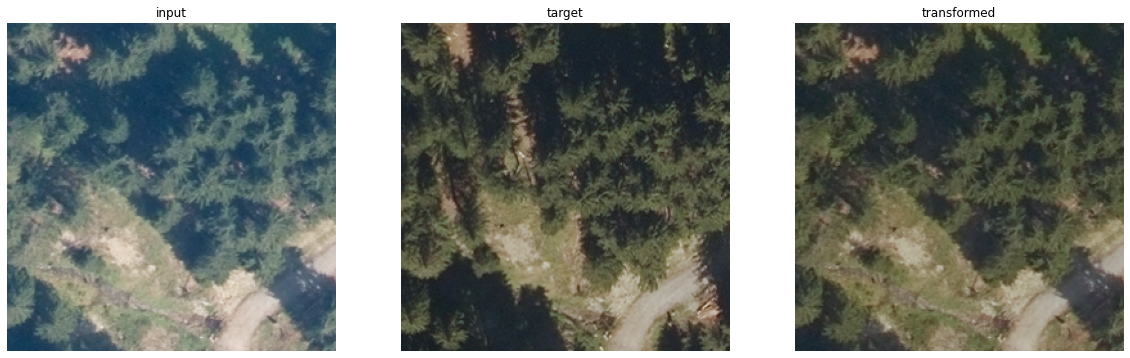

In [38]:
fig = plt.figure(figsize=(20,20))
        
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img_1[:,:,:3])
a.set_title('input')
plt.axis('off')

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(img_2[:,:,:3])
a.set_title('target')
plt.axis('off')

a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(img_3[:,:,:3])
a.set_title('transformed')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

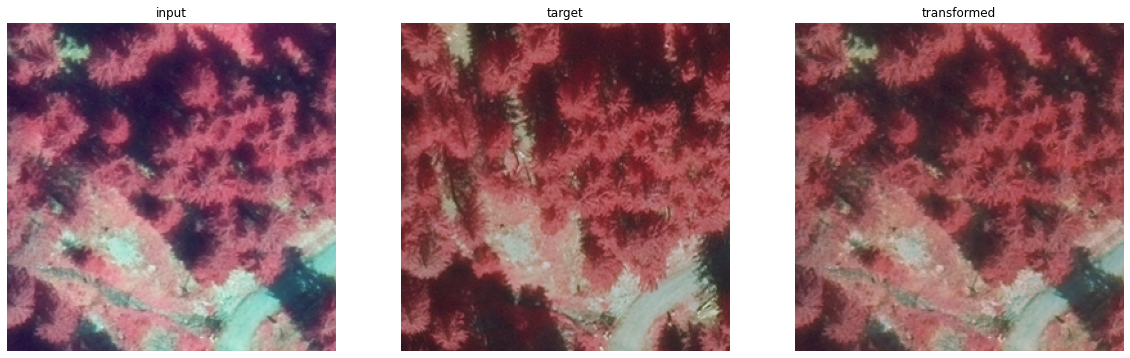

In [39]:
fig = plt.figure(figsize=(20,20))
        
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(np.roll(img_1, 1, axis=2)[:,:,:3])
a.set_title('input')
plt.axis('off')

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(np.roll(img_2, 1, axis=2)[:,:,:3])
a.set_title('target')
plt.axis('off')

a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(np.roll(img_3, 1, axis=2)[:,:,:3])
a.set_title('transformed')
plt.axis('off')

In [ ]:
### end test ###

In [3]:
path_1 = "/media/philipp/DATA/color_corr_matrix/overlap_tamsweg_zell_am_see.tif"
path_2 = "/media/philipp/DATA/color_corr_matrix/overlap_zell_am_see_tamsweg.tif"

In [4]:
img_1 = tif2array(path_1, dtype=np.uint8)

In [7]:
img_2 = tif2array(path_2, dtype=np.uint8)

In [7]:
ColorCorrectionMatrix = np.linalg.lstsq(img_1, img_2)[0]

LinAlgError: 3-dimensional array given. Array must be two-dimensional

In [5]:
img_1.shape

(184941, 12499, 4)

In [11]:
img_2.shape

(184941, 12499, 4)

In [6]:
img_1[14,14,:]

array([33, 44, 52, 94], dtype=uint8)

In [10]:
img_2[14,14,:]

array([ 81, 108, 125, 131], dtype=uint8)

In [7]:
img_1

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [ 78,  85,  67, 174],
        [ 83,  90,  74, 180],
        [ 80,  86,  70, 176]],

       ...,

       [[ 19,  42,  52,   7],
        [ 19,  41,  51,   7],
        [ 20,  42,  52,   6],
        ...,
        [122, 111,  91, 151],
        [130, 119, 100, 159],
        [132, 122, 102, 162]],

       [[ 19,  42,  51,   6],
        [ 18,  38,  46,   5],
        [ 20,  42,  51,   6],
        ...,
        [127, 118,  98, 157],
        [126, 116,  96, 155],
        [124, 115,  94, 154]],

       [[  0

In [8]:
img_1_res = img_1.flatten(order='F').reshape(-1, 4)

In [15]:
img_1_res.shape

(2311577559, 4)

In [18]:
img_1_res[2311507]

array([142, 147, 140, 147], dtype=uint8)

In [21]:
2311507/184941

12.49861847832552

In [22]:
2311507 - 184941*12

92215

In [23]:
img_1[92215,12,:]

array([ 94, 106,  78, 194], dtype=uint8)

In [19]:
x = np.array([[np.arange(100,110), np.arange(110,120), np.arange(120,130)],
             [np.arange(200,210), np.arange(210,220), np.arange(220,230)],
             [np.arange(300,310), np.arange(310,320), np.arange(320,330)],
             [np.arange(400,410), np.arange(410,420), np.arange(420,430)]])

In [20]:
x.shape

(4, 3, 10)

In [26]:
x

array([[[100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
        [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124, 125, 126, 127, 128, 129]],

       [[200, 201, 202, 203, 204, 205, 206, 207, 208, 209],
        [210, 211, 212, 213, 214, 215, 216, 217, 218, 219],
        [220, 221, 222, 223, 224, 225, 226, 227, 228, 229]],

       [[300, 301, 302, 303, 304, 305, 306, 307, 308, 309],
        [310, 311, 312, 313, 314, 315, 316, 317, 318, 319],
        [320, 321, 322, 323, 324, 325, 326, 327, 328, 329]]])

In [23]:
x_f = x.flatten(order='F')

In [24]:
x_f

array([100, 200, 300, 110, 210, 310, 120, 220, 320, 101, 201, 301, 111,
       211, 311, 121, 221, 321, 102, 202, 302, 112, 212, 312, 122, 222,
       322, 103, 203, 303, 113, 213, 313, 123, 223, 323, 104, 204, 304,
       114, 214, 314, 124, 224, 324, 105, 205, 305, 115, 215, 315, 125,
       225, 325, 106, 206, 306, 116, 216, 316, 126, 226, 326, 107, 207,
       307, 117, 217, 317, 127, 227, 327, 108, 208, 308, 118, 218, 318,
       128, 228, 328, 109, 209, 309, 119, 219, 319, 129, 229, 329])

In [25]:
x_f.reshape(30, 3)

array([[100, 200, 300],
       [110, 210, 310],
       [120, 220, 320],
       [101, 201, 301],
       [111, 211, 311],
       [121, 221, 321],
       [102, 202, 302],
       [112, 212, 312],
       [122, 222, 322],
       [103, 203, 303],
       [113, 213, 313],
       [123, 223, 323],
       [104, 204, 304],
       [114, 214, 314],
       [124, 224, 324],
       [105, 205, 305],
       [115, 215, 315],
       [125, 225, 325],
       [106, 206, 306],
       [116, 216, 316],
       [126, 226, 326],
       [107, 207, 307],
       [117, 217, 317],
       [127, 227, 327],
       [108, 208, 308],
       [118, 218, 318],
       [128, 228, 328],
       [109, 209, 309],
       [119, 219, 319],
       [129, 229, 329]])